In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os,shutil

In [3]:
original_dataset_dir = '/Users/aishwaryamv/Downloads/Colors'

In [4]:
base_dir = '/Users/aishwaryamv/Downloads/Colors/Dataset' 

train_dir = os.path.join(base_dir, 'train') 

validation_dir = os.path.join(base_dir, 'validation') 

test_dir = os.path.join(base_dir, 'test') 



In [5]:
train_reds_dir = os.path.join(train_dir, 'Reds') 
train_blues_dir = os.path.join(train_dir, 'Blues') 

In [6]:
validation_reds_dir = os.path.join(validation_dir, 'Reds') 
validation_blues_dir = os.path.join(validation_dir, 'Blues') 

In [7]:
test_reds_dir = os.path.join(test_dir, 'Reds') 
test_blues_dir = os.path.join(test_dir, 'Blues') 

In [8]:
print('total training red images:', len(os.listdir(train_reds_dir)))

total training red images: 80


In [9]:
print('total training blue images:', len(os.listdir(train_blues_dir)))

total training blue images: 80


In [10]:
print('total validation red images:', len(os.listdir(validation_reds_dir)))

total validation red images: 10


In [11]:
print('total validation blue images:', len(os.listdir(validation_blues_dir)))

total validation blue images: 10


In [12]:
print('total test red images:', len(os.listdir(test_reds_dir)))

total test red images: 10


In [13]:
print('total test blue images:', len(os.listdir(test_blues_dir)))

total test blue images: 10


In [14]:
from keras import layers
from keras import models
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(32, 32, 3))) # 30 x 30
model.add(layers.MaxPooling2D((2, 2))) # 15 x 15
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # 13 x 13
model.add(layers.MaxPooling2D((2, 2))) # 6 x 6
model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # 4 x 4
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))


Using TensorFlow backend.


In [15]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)              

In [16]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])


In [17]:
from keras.preprocessing.image import ImageDataGenerator


In [18]:
train_datagen = ImageDataGenerator(rescale=1) 
test_datagen = ImageDataGenerator(rescale=1)

In [19]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory( 
    validation_dir,
    target_size=(32, 32),
    batch_size=20,
    class_mode='binary')


Found 160 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [20]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 32, 32, 3)
labels batch shape: (20,)


In [21]:
history = model.fit_generator( train_generator,
      steps_per_epoch=100,
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/2
100/100 [==============================] - 10s 98ms/step - loss: 0.0533 - acc: 0.9925 - val_loss: 3.4196e-12 - val_acc: 1.0000
Epoch 2/2
100/100 [==============================] - 9s 90ms/step - loss: 9.1738e-10 - acc: 1.0000 - val_loss: 2.7256e-12 - val_acc: 1.0000


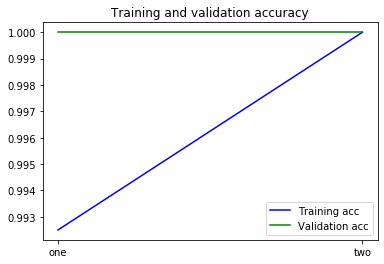

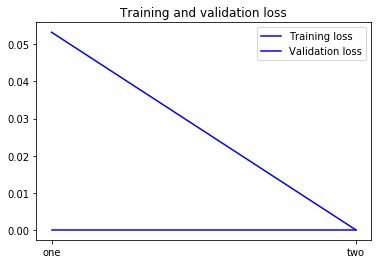

In [25]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc') 
plt.plot(epochs, val_acc, 'g', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.xticks(np.arange(1, 3), labels=('one','two'))
fig = plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.xticks(np.arange(1, 3), labels=('one','two'))
plt.show()

(32, 32)

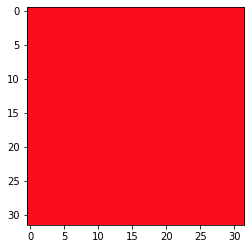

In [23]:
img = Image.open(train_reds_dir + '/Red0.png')
plt.imshow(img)
img = np.asarray(img)
img.shape

In [70]:
test_datagen = ImageDataGenerator(rescale=1)
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(32, 32),
    color_mode="rgb",
    batch_size=1,
    class_mode='binary',
    shuffle=False
)
filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_generator,steps=nb_samples)


Found 20 images belonging to 2 classes.


array([1.3091502e-16, 9.6874066e-18, 1.0270907e-10, 1.8106441e-20,
       8.6141853e-18, 3.4227243e-14, 4.9599942e-18, 4.1557078e-18,
       4.6404726e-16, 3.4477405e-14, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
      dtype=float32)

In [73]:
predicted_class_indices=np.asarray(predict, dtype=int)
predicted_class_indices = predicted_class_indices.reshape(20,)
pr = predicted_class_indices.tolist()
print(pr)
    

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [75]:
labels = (train_generator.class_indices)
a = dict((v,k) for k,v in labels.items())

predictions = [a[k] for k in pr]

filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
print(results)

            Filename Predictions
0   Blues/Blue90.jpg       Blues
1   Blues/Blue91.jpg       Blues
2   Blues/Blue92.jpg       Blues
3   Blues/Blue93.jpg       Blues
4   Blues/Blue94.jpg       Blues
5   Blues/Blue95.jpg       Blues
6   Blues/Blue96.jpg       Blues
7   Blues/Blue97.jpg       Blues
8   Blues/Blue98.jpg       Blues
9   Blues/Blue99.jpg       Blues
10    Reds/Red90.png        Reds
11    Reds/Red91.png        Reds
12    Reds/Red92.png        Reds
13    Reds/Red93.png        Reds
14    Reds/Red94.png        Reds
15    Reds/Red95.png        Reds
16    Reds/Red96.png        Reds
17    Reds/Red97.png        Reds
18    Reds/Red98.png        Reds
19    Reds/Red99.png        Reds
